In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer

In [2]:
adult_df = pd.read_csv("adult.txt")
covtype_df = pd.read_csv("covtype.txt",names=list(range(0,55)))
letter_df = pd.read_csv("letter-recognition.txt",names=list(range(0,17))) 
#census_df = pd.read_csv("census-income.txt",names=list(range(0,42)))

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [4]:
imp_mean = SimpleImputer(missing_values=" ?", strategy="most_frequent").fit(adult_df)
adult_df = pd.DataFrame(imp_mean.transform(adult_df), columns=adult_df.columns)
adult_df = pd.get_dummies(adult_df, columns = ['workclass', 'education', 'marital-status', 'occupation', 
                                               'relationship', 'race', 'sex', 'native-country'])
# convert prediction data into binary labels
pred = np.where(adult_df['pred'] == ' >50K',1,0)
adult_df.drop(columns=['pred'], inplace=True)

# scale quantitative data
scaler = MinMaxScaler().fit(adult_df)
adult_df = pd.DataFrame(scaler.transform(adult_df),columns=adult_df.columns)
adult_df['pred'] = pred

adult_df.sample(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,pred
3364,0.041096,0.117676,0.600000,0.00000,0.0,0.244898,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
30250,0.643836,0.130057,0.533333,0.00000,0.0,0.071429,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
10750,0.643836,0.194249,0.533333,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
18553,0.328767,0.193492,0.533333,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [5]:
pred_column = covtype_df[54]
positive_label = pred_column.value_counts().index[0]

# convert prediction data into binary labels
pred_column = np.where(pred_column == positive_label, 1, 0)

covtype_df.drop(columns=[54],inplace=True)

In [6]:
scaler = MinMaxScaler().fit(covtype_df)
covtype_df = pd.DataFrame(scaler.transform(covtype_df),columns=covtype_df.columns)
covtype_df.insert(54,'pred',pred_column,True)
covtype_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,pred
204398,0.625813,0.241667,0.242424,0.068003,0.233850,0.263032,0.952756,0.838583,0.381890,0.392304,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
431016,0.639820,0.000000,0.166667,0.193271,0.310078,0.501475,0.803150,0.866142,0.602362,0.218876,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
129394,0.579790,0.266667,0.106061,0.154617,0.248062,0.614163,0.913386,0.905512,0.515748,0.101073,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
209594,0.573287,0.016667,0.106061,0.021475,0.226098,0.130673,0.830709,0.889764,0.598425,0.358427,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
390001,0.731866,0.566667,0.272727,0.212598,0.333333,0.478291,0.814961,0.996063,0.692913,0.069009,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
163422,0.616808,0.844444,0.136364,0.115963,0.267442,0.649712,0.771654,0.929134,0.708661,0.333055,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
102106,0.514757,0.333333,0.136364,0.107373,0.268734,0.485317,0.929134,0.913386,0.500000,0.245086,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
263659,0.194597,0.347222,0.651515,0.154617,0.400517,0.133343,0.976378,0.673228,0.019685,0.050467,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
569387,0.461231,0.494444,0.090909,0.021475,0.219638,0.456232,0.877953,0.960630,0.610236,0.219016,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
217827,0.707854,0.205556,0.287879,0.193271,0.275194,0.504567,0.940945,0.787402,0.326772,0.244528,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
letter_col = letter_df[0]
letter_df.drop(columns=[0],inplace=True)

In [8]:
scaler = MinMaxScaler().fit(letter_df)
letter_df_p1 = pd.DataFrame(scaler.transform(letter_df),columns=letter_df.columns)
letter_df_p2 = pd.DataFrame(scaler.transform(letter_df),columns=letter_df.columns)

# two ways to make binary classification labels
letter_df_p1_pred = np.where(letter_col == 'O', 1, 0)
letter_df_p2_pred = np.where(letter_col.isin([chr(x) for x in range(ord('A'), ord('M') + 1)]), 1, 0)
letter_df_p1.insert(16,'pred',letter_df_p1_pred,True)
letter_df_p2.insert(16,'pred',letter_df_p2_pred,True)


letter_df_p1.sample(10, random_state=0)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,pred
19134,0.200000,0.200000,0.266667,0.133333,0.066667,0.266667,0.733333,0.133333,0.466667,0.733333,0.666667,0.333333,0.066667,0.733333,0.133333,0.333333,0
4981,0.200000,0.333333,0.400000,0.266667,0.266667,0.600000,0.400000,0.200000,0.400000,0.666667,0.333333,0.466667,0.133333,0.533333,0.333333,0.600000,0
16643,0.266667,0.533333,0.266667,0.333333,0.133333,0.200000,0.533333,0.533333,0.133333,0.466667,0.333333,0.733333,0.266667,0.533333,0.200000,0.666667,0
19117,0.333333,0.666667,0.466667,0.466667,0.266667,0.266667,0.666667,0.133333,0.533333,0.733333,0.800000,0.600000,0.200000,0.600000,0.133333,0.400000,0
5306,0.266667,0.466667,0.266667,0.533333,0.333333,0.533333,0.466667,0.400000,0.266667,0.533333,0.466667,0.600000,0.200000,0.533333,0.400000,0.533333,0
230,0.466667,0.666667,0.666667,0.533333,0.333333,0.466667,0.533333,0.200000,0.333333,0.666667,0.400000,0.466667,0.466667,0.533333,0.066667,0.533333,0
3148,0.400000,0.666667,0.400000,0.466667,0.466667,0.266667,0.666667,0.133333,0.200000,0.600000,0.533333,0.533333,0.466667,0.733333,0.133333,0.466667,0
11525,0.400000,0.733333,0.400000,0.533333,0.466667,0.333333,0.666667,0.533333,0.200000,0.466667,0.266667,0.533333,0.133333,0.466667,0.333333,0.733333,0
13672,0.333333,0.600000,0.533333,0.533333,0.600000,0.466667,0.533333,0.333333,0.266667,0.533333,0.400000,0.533333,0.466667,0.600000,0.533333,0.533333,0
1624,0.266667,0.333333,0.333333,0.533333,0.133333,0.466667,0.466667,0.266667,0.933333,0.600000,0.400000,0.533333,0.000000,0.533333,0.533333,0.533333,0


In [9]:
letter_df_p2.sample(10, random_state=0)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,pred
19134,0.200000,0.200000,0.266667,0.133333,0.066667,0.266667,0.733333,0.133333,0.466667,0.733333,0.666667,0.333333,0.066667,0.733333,0.133333,0.333333,0
4981,0.200000,0.333333,0.400000,0.266667,0.266667,0.600000,0.400000,0.200000,0.400000,0.666667,0.333333,0.466667,0.133333,0.533333,0.333333,0.600000,1
16643,0.266667,0.533333,0.266667,0.333333,0.133333,0.200000,0.533333,0.533333,0.133333,0.466667,0.333333,0.733333,0.266667,0.533333,0.200000,0.666667,1
19117,0.333333,0.666667,0.466667,0.466667,0.266667,0.266667,0.666667,0.133333,0.533333,0.733333,0.800000,0.600000,0.200000,0.600000,0.133333,0.400000,0
5306,0.266667,0.466667,0.266667,0.533333,0.333333,0.533333,0.466667,0.400000,0.266667,0.533333,0.466667,0.600000,0.200000,0.533333,0.400000,0.533333,0
230,0.466667,0.666667,0.666667,0.533333,0.333333,0.466667,0.533333,0.200000,0.333333,0.666667,0.400000,0.466667,0.466667,0.533333,0.066667,0.533333,0
3148,0.400000,0.666667,0.400000,0.466667,0.466667,0.266667,0.666667,0.133333,0.200000,0.600000,0.533333,0.533333,0.466667,0.733333,0.133333,0.466667,0
11525,0.400000,0.733333,0.400000,0.533333,0.466667,0.333333,0.666667,0.533333,0.200000,0.466667,0.266667,0.533333,0.133333,0.466667,0.333333,0.733333,0
13672,0.333333,0.600000,0.533333,0.533333,0.600000,0.466667,0.533333,0.333333,0.266667,0.533333,0.400000,0.533333,0.466667,0.600000,0.533333,0.533333,1
1624,0.266667,0.333333,0.333333,0.533333,0.133333,0.466667,0.466667,0.266667,0.933333,0.600000,0.400000,0.533333,0.000000,0.533333,0.533333,0.533333,0


<br>

In [10]:
def progressBar(current, total, barLength = 20):
    percent = float(current) * 100 / total
    arrow   = '-' * int(percent/100 * barLength - 1) + '>'
    spaces  = ' ' * (barLength - len(arrow))

    print('Progress: [%s%s] %d %%' % (arrow, spaces, percent), end='\r')

In [11]:
def run_classifiers(data):
    out = []
    
    iterations = 3
    for i in range(iterations):
        # draw 5k samples for training data, and set aside the rest for testing 
        X_train, Y_train, X_test, Y_test = draw_samples(data)
        # returns the gridsearchCV model list thing
        gridcvs = create_gridsearch()
        
        cvscores = run_gridsearch(gridcvs, X_train, Y_train)
        
        best_algos = best_model_selection(gridcvs, X_train, Y_train)
        
        stats = output_statistics(best_algos, X_train, Y_train, X_test, Y_test)
        
        out.append([gridcvs, cvscores, best_algos, stats])
        
    return out

In [279]:
def draw_samples(data, n = 5000):
    train_index = random.sample(range(0,len(data)), n)
    # assumes target column is last column
    X_train, Y_train = data.iloc[train_index, :-1], data.iloc[train_index, -1]
    
    test = data[~data.index.isin(train_index)]
    X_test, Y_test = test.iloc[:, :-1], test.iloc[:, -1]

    return X_train, Y_train, X_test, Y_test

In [13]:
def create_gridsearch():
    # Initializing Classifiers
    clf1 = LogisticRegression(solver='saga',
                              random_state=0)

    clf2 = KNeighborsClassifier(algorithm='ball_tree',
                                leaf_size=50)
    clf3 = SVC(random_state=0)

    clf4 = RandomForestClassifier(random_state=0)

    clf5 = PassiveAggressiveClassifier(max_iter=5000, random_state=0, tol=1e-3)


    # Building the pipelines
    pipe1 = Pipeline([('classifier', clf1)])

    pipe2 = Pipeline([('classifier', clf2)])

    pipe3 = Pipeline([('classifier', clf3)])

    pipe4 = Pipeline([('classifier', clf4)])

    pipe5 = Pipeline([('classifier', clf5)])



    # Setting up the parameter grids
    param_grid1 = [{'classifier__penalty': ['none', 'l1', 'l2'],
                    'classifier__C': np.logspace(-8, 4, 13)}]

    param_grid2 = [{'classifier__n_neighbors': np.geomspace(1, 500, num=25, dtype=int),
                    'classifier__weights': ['uniform', 'distance']}]

    param_grid3 = [{'classifier__kernel': ['rbf'],
                    'classifier__C': np.power(10., np.arange(-7, 4)),
                    'classifier__gamma': [0.001,0.005,0.01,0.05,0.1,0.5,1,2]},
                   {'classifier__kernel': ['linear'],                
                    'classifier__C': np.power(10., np.arange(-7, 4))},
                   {'classifier__kernel': ['polynomial'],
                    'classifier__degree': [2,3],
                    'classifier__C': np.power(10., np.arange(-7, 4))}]

    param_grid4 = [{'classifier__n_estimators': [1024],
                    'classifier__max_features': [1,2,4,6,8,12,16, 20]}]

    param_grid5 = [{'classifier__C': np.logspace(-8,4,13),
                    'classifier__loss': ['hinge', 'squared_hinge']}]


    # Setting up multiple GridSearchCV objects, 1 for each algorithm
    gridcvs = {}

    for pgrid, est, name in zip((param_grid1, param_grid2, param_grid3, param_grid4,param_grid5),
                                (pipe1, pipe2, pipe3, pipe4, pipe5),
                                ('Logistic', 'KNN', 'SVM', 'RF', 'PAC')):
        gcv = GridSearchCV(estimator=est,
                           param_grid=pgrid,
                           scoring='accuracy', #scoring
                           n_jobs=1,
                           cv=5, 
                           verbose=0,
                           refit=True)
        gridcvs[name] = gcv
    return gridcvs

In [14]:
def run_gridsearch(gridcvs, X_train, Y_train):
    warnings.filterwarnings('ignore')
    
    cv_scores = {name: [] for name, gs_est in gridcvs.items()}

    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    # The outer loop for algorithm selection
    c = 1
    for outer_train_idx, outer_valid_idx in skfold.split(X_train,Y_train):
        for name, gs_est in sorted(gridcvs.items()):
            print('outer fold %d/5 | tuning %-8s' % (c, name), end='')

            # The inner loop for hyperparameter tuning
            gs_est.fit(X_train.iloc[outer_train_idx], Y_train.iloc[outer_train_idx])
            y_pred = gs_est.predict(X_train.iloc[outer_valid_idx])
            acc = accuracy_score(y_true=Y_train.iloc[outer_valid_idx], y_pred=y_pred)
            print(' | inner ACC %.2f%% | outer ACC %.2f%%' %
                  (gs_est.best_score_ * 100, acc * 100))
            cv_scores[name].append(acc)

        c += 1
    # Looking at the results
    for name in cv_scores:
        print('%-8s | outer CV acc. %.2f%% +\- %.3f' % (
              name, 100 * np.mean(cv_scores[name]), 100 * np.std(cv_scores[name])))
    print()
    for name in cv_scores:
        print('{} best parameters'.format(name), gridcvs[name].best_params_)
        
    return cv_scores

In [15]:
def best_model_selection(gridcvs, X_train, Y_train):
    
    # Fitting a model to the whole training set using the proposed best algorithm per class
    best_algos = []
    for model_class in ['Logistic', 'KNN', 'SVM', 'RF', 'PAC']:
        best_algo = gridcvs[model_class]

        best_algo.fit(X_train, Y_train)  ## TODO: add timing
        best_algos.append(best_algo)
    return best_algos

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [17]:
def output_statistics(best_algos, X_train, Y_train, X_test, Y_test):
    
    # wrapper function to get error metrics
    def get_score(func, best_algo, X_train, Y_train, X_test, Y_test):
        
        train_metric = func(y_true=Y_train, y_pred=best_algo.predict(X_train))
        test_metric = func(y_true=Y_test, y_pred=best_algo.predict(X_test))
        
        return train_metric, test_metric
    
    # for each algorithm, get the list of train and test metrics
    algo_metrics = dict()
    for name, algo in zip(['Logistic', 'KNN', 'SVM', 'RF', 'PAC'], best_algos):
        
        train_metric, test_metric = dict(), dict()
        for metric in [accuracy_score, matthews_corrcoef, f1_score]:
            train, test = get_score(metric, algo, X_train, Y_train, X_test, Y_test)

            train_metric[metric.__name__] = train
            test_metric[metric.__name__] = test
            
        algo_metrics[name] = [train_metric, test_metric]
        
    return algo_metrics

In [18]:
%%time
bigdata = []
for df in [adult_df, covtype_df, letter_df_p1, letter_df_p2]:
    data = run_classifiers(df)
    bigdata.append(data)

outer fold 1/5 | tuning KNN      | inner ACC 83.65% | outer ACC 83.00%
outer fold 1/5 | tuning Logistic | inner ACC 85.10% | outer ACC 85.70%
outer fold 1/5 | tuning PAC      | inner ACC 84.73% | outer ACC 84.60%
outer fold 1/5 | tuning RF       | inner ACC 85.12% | outer ACC 86.10%
outer fold 1/5 | tuning SVM      | inner ACC 84.90% | outer ACC 85.60%
outer fold 2/5 | tuning KNN      | inner ACC 83.60% | outer ACC 84.20%
outer fold 2/5 | tuning Logistic | inner ACC 85.00% | outer ACC 85.30%
outer fold 2/5 | tuning PAC      | inner ACC 84.42% | outer ACC 83.70%
outer fold 2/5 | tuning RF       | inner ACC 85.43% | outer ACC 87.80%
outer fold 2/5 | tuning SVM      | inner ACC 84.87% | outer ACC 85.40%
outer fold 3/5 | tuning KNN      | inner ACC 83.67% | outer ACC 84.60%
outer fold 3/5 | tuning Logistic | inner ACC 84.30% | outer ACC 86.10%
outer fold 3/5 | tuning PAC      | inner ACC 83.97% | outer ACC 86.20%
outer fold 3/5 | tuning RF       | inner ACC 85.65% | outer ACC 85.80%
outer 

outer fold 3/5 | tuning SVM      | inner ACC 79.48% | outer ACC 78.40%
outer fold 4/5 | tuning KNN      | inner ACC 77.12% | outer ACC 79.90%
outer fold 4/5 | tuning Logistic | inner ACC 74.50% | outer ACC 76.70%
outer fold 4/5 | tuning PAC      | inner ACC 73.50% | outer ACC 74.70%
outer fold 4/5 | tuning RF      

KeyboardInterrupt: 

In [49]:
np.geomspace(.05, 1.0, 7)

array([0.05      , 0.08237745, 0.13572088, 0.2236068 , 0.36840315,
       0.60696223, 1.        ])

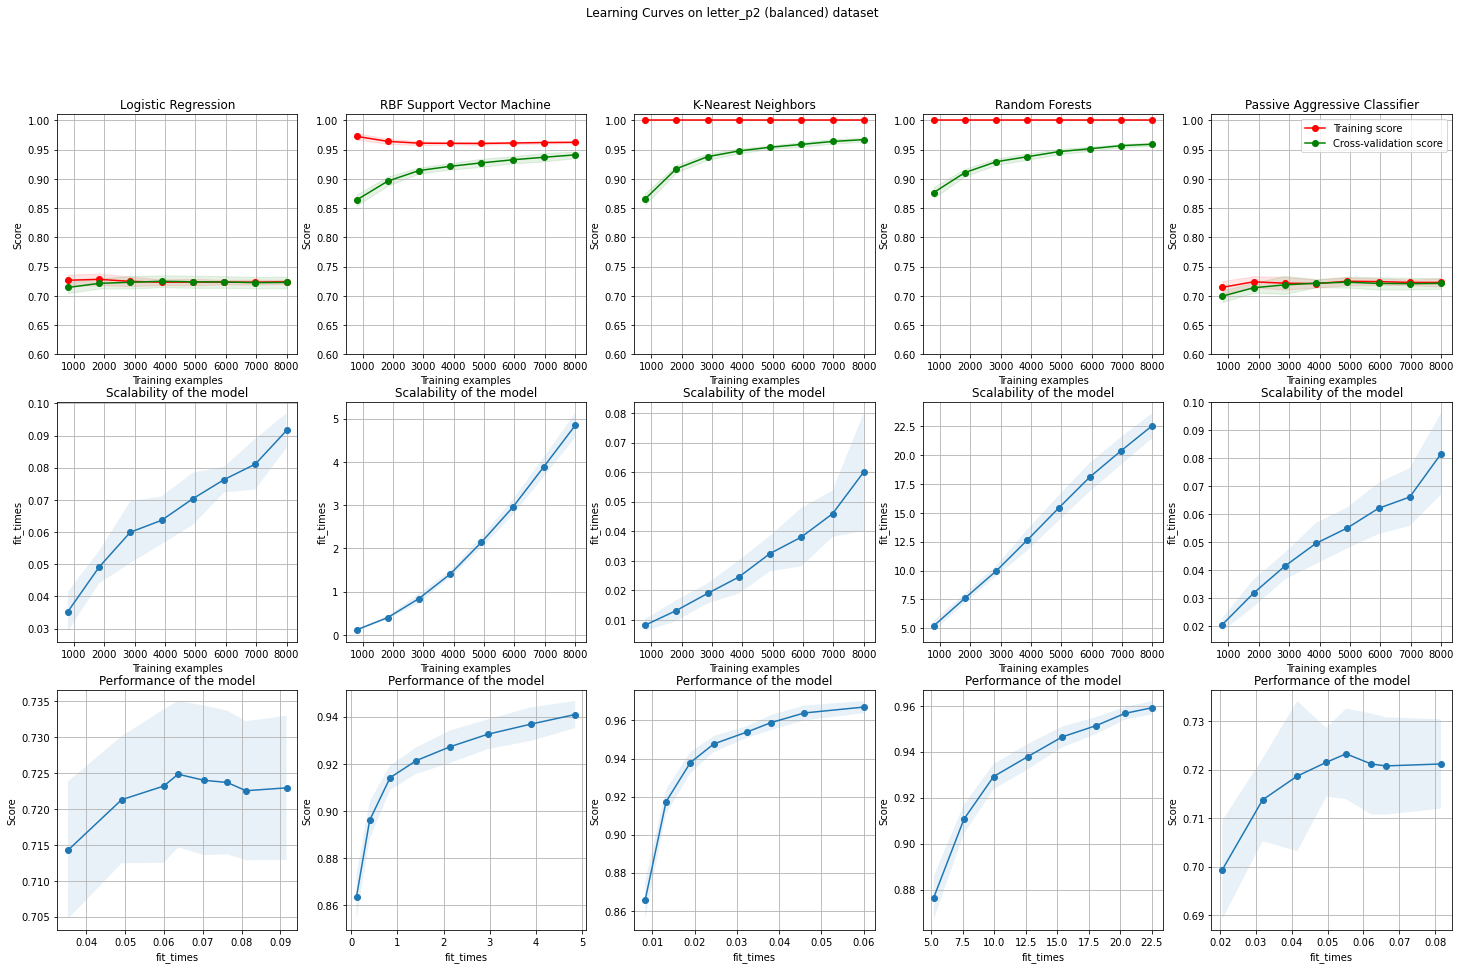

Wall time: 7min 19s


In [50]:
%%time

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# credit to https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html 
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 8), legend = False):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    if legend == True:
        axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 5, figsize=(25, 15))

X, y,_, _ = draw_samples(letter_df_p2, n = 10000)

title = "Logistic Regression"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = LogisticRegression(solver='saga', random_state=0, C=10, penalty='l2')
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)

title = r"K-Nearest Neighbors"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator =  KNeighborsClassifier(algorithm='ball_tree',
                                  leaf_size=50, 
                                  n_neighbors = 2,
                                  weights = 'distance')
plot_learning_curve(estimator, title, X, y, axes=axes[:, 2], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)

title = r"RBF Support Vector Machine"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(random_state=0, C = 100, gamma=1, kernel='rbf')
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)

title = r"Random Forests"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(random_state=0, max_features = 4,
                              n_estimators = 1024)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 3], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)

title = r"Passive Aggressive Classifier"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = PassiveAggressiveClassifier(max_iter=5000, random_state=0, tol=1e-3,
                                   C = 0.01, loss = 'hinge')
plot_learning_curve(estimator, title, X, y, axes=axes[:, 4], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4, legend = True)

plt.suptitle('Learning Curves on letter_p2 (balanced) dataset')
plt.savefig('learning_curve_analysis.png')
plt.show()


<br><br>

In [51]:
big_dataframe = pd.read_pickle("big_dataframe.pkl")

In [60]:
big_dataframe['best_algos'][2].cv_results_

{'mean_fit_time': array([1.60698986, 0.03592396, 1.84974265, 1.66919732, 0.02681613,
        1.37185001, 1.58403602, 0.03399496, 0.23061714, 1.7279634 ,
        0.03288813, 0.31734915, 1.78129821, 0.0250802 , 0.22422953,
        1.62093906, 0.04243832, 0.31534505, 1.645895  , 0.24451818,
        0.33821549, 1.83913178, 0.52818089, 0.415587  , 1.67413454,
        2.23265376, 1.65879569, 1.81251974, 2.32191153, 1.89767151,
        1.73206468, 2.45886512, 1.84031205, 1.36949978, 2.50479498,
        1.59650421, 1.72625475, 2.43750086, 1.57725205]),
 'std_fit_time': array([0.07283684, 0.01530862, 0.18199421, 0.34160314, 0.00220324,
        0.2497775 , 0.21151497, 0.007552  , 0.01573708, 0.11627968,
        0.00489688, 0.04526565, 0.19350676, 0.00307074, 0.0297051 ,
        0.24040184, 0.01776518, 0.03416268, 0.22674346, 0.07977962,
        0.06259161, 0.21541352, 0.11363664, 0.06226192, 0.1852867 ,
        0.04826544, 0.04441175, 0.13348701, 0.31287838, 0.14907142,
        0.22300492, 0.249

In [212]:
dfcv = big_dataframe[~big_dataframe['cvscores'].isnull()].drop(columns=['gridcvs', 'best_algos', 'stats', 'is_train'])

datasets = ['adult_df', 'covtype_df', 'letter_df_p1', 'letter_df_p2']
trials = [0, 1, 2]
algorithms = ['Logistic', 'KNN', 'SVM', 'RF', 'PAC']
eee = []
for i in datasets:
    for j in algorithms:
        templist = dfcv[(dfcv['dataset'] == i) & (dfcv['algorithm'] == j)]['cvscores'].tolist()
        lislis = sum(templist, [])
        [eee.append([i,j, k]) for k in lislis]

mergecvs = pd.DataFrame(eee, columns = ['dataset', 'algorithm', 'accs'])

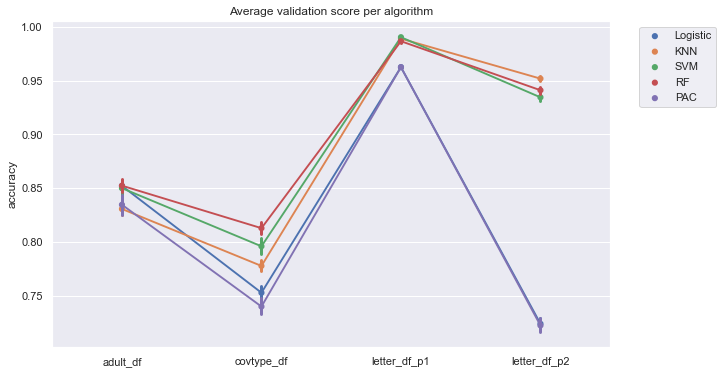

In [213]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
sns.pointplot('dataset', 'accs', hue='algorithm',
    data=mergecvs, dodge=False, join=True, errwidth=3,
             scale=.7)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.title('Average validation score per algorithm')
plt.ylabel('accuracy')
plt.xlabel('');
plt.savefig('validation_score.png',bbox_inches='tight')


<br>

In [214]:
# description of problem table1

In [339]:
big_dataframe[big_dataframe['algorithm'] == 'KNN']['stats'][8]

[{'accuracy_score': 1.0, 'matthews_corrcoef': 1.0, 'f1_score': 1.0},
 {'accuracy_score': 0.8285620986176119,
  'matthews_corrcoef': 0.5106297801515467,
  'f1_score': 0.6178112108711479}]

In [341]:
# table of scores per metric

dfmetric = big_dataframe[~big_dataframe['stats'].isnull()].drop(columns=['gridcvs', 'best_algos', 'cvscores'])
dfmetric = dfmetric[dfmetric['is_train'] == False].drop(columns = ['is_train'])


datasets = ['adult_df', 'covtype_df', 'letter_df_p1', 'letter_df_p2']
trials = [0, 1, 2]
algorithms = ['Logistic', 'KNN', 'SVM', 'RF', 'PAC']
eee = []
for i in datasets:
    for j in algorithms:
        templist = dfmetric[(dfmetric['dataset'] == i) & (dfmetric['algorithm'] == j)]['stats'].tolist()
        
        eee.append(sum([[i], [j], np.mean([list(templist[i][0].values()) for i in range(3)], axis=0).tolist(), [True]], []))
        eee.append(sum([[i], [j], np.mean([list(templist[i][1].values()) for i in range(3)], axis=0).tolist(), [False]], []))


mergescores = pd.DataFrame(eee, columns = ['dataset', 'algorithm', 
                                           'accuracy_score', 'f1_score', 'matthews_corrcoef',
                                           'isTrain'])

In [350]:
testscores = mergescores[mergescores['isTrain'] == False].drop(columns='isTrain')
testscores['mean'] = testscores.apply(lambda row: (row['accuracy_score'] + row['f1_score']  + row['matthews_corrcoef'])/3, axis = 1)

In [352]:
print(testscores.to_latex(index = False))

\begin{tabular}{llrrrr}
\toprule
      dataset & algorithm &  accuracy\_score &  f1\_score &  matthews\_corrcoef &      mean \\
\midrule
     adult\_df &  Logistic &        0.848397 &  0.562177 &           0.652493 &  0.687689 \\
     adult\_df &       KNN &        0.828598 &  0.507330 &           0.612841 &  0.649590 \\
     adult\_df &       SVM &        0.845881 &  0.554756 &           0.646761 &  0.682466 \\
     adult\_df &        RF &        0.850707 &  0.573323 &           0.665464 &  0.696498 \\
     adult\_df &       PAC &        0.839665 &  0.527269 &           0.611723 &  0.659552 \\
   covtype\_df &  Logistic &        0.752906 &  0.506414 &           0.751371 &  0.670230 \\
   covtype\_df &       KNN &        0.792618 &  0.585539 &           0.790082 &  0.722746 \\
   covtype\_df &       SVM &        0.801670 &  0.604126 &           0.800954 &  0.735583 \\
   covtype\_df &        RF &        0.821872 &  0.644257 &           0.820572 &  0.762233 \\
   covtype\_df &       PAC

In [355]:
dfesase = testscores.drop(columns=['accuracy_score','f1_score','matthews_corrcoef'])

In [356]:
dfesase

,dataset,algorithm,mean
1,adult_df,Logistic,0.687689
3,adult_df,KNN,0.649590
5,adult_df,SVM,0.682466
7,adult_df,RF,0.696498
9,adult_df,PAC,0.659552
11,covtype_df,Logistic,0.670230
13,covtype_df,KNN,0.722746
15,covtype_df,SVM,0.735583
17,covtype_df,RF,0.762233
19,covtype_df,PAC,0.658580


In [367]:
pivotedone = pd.pivot_table(dfesase, index='algorithm', columns=['dataset'],values='mean')
pivotedone['mean'] = pivotedone.mean(axis=1)
pivotedone

dataset,adult_df,covtype_df,letter_df_p1,letter_df_p2,mean
algorithm,,,,,
KNN,0.649590,0.722746,0.921703,0.940777,0.808704
Logistic,0.687689,0.670230,0.320484,0.638799,0.579301
PAC,0.659552,0.658580,0.320756,0.639168,0.569514
RF,0.696498,0.762233,0.879860,0.928515,0.816777
SVM,0.682466,0.735583,0.929284,0.925238,0.818143


In [368]:
print(pivotedone.to_latex(index = True))

\begin{tabular}{lrrrrr}
\toprule
dataset &  adult\_df &  covtype\_df &  letter\_df\_p1 &  letter\_df\_p2 &      mean \\
algorithm &           &             &               &               &           \\
\midrule
KNN       &  0.649590 &    0.722746 &      0.921703 &      0.940777 &  0.808704 \\
Logistic  &  0.687689 &    0.670230 &      0.320484 &      0.638799 &  0.579301 \\
PAC       &  0.659552 &    0.658580 &      0.320756 &      0.639168 &  0.569514 \\
RF        &  0.696498 &    0.762233 &      0.879860 &      0.928515 &  0.816777 \\
SVM       &  0.682466 &    0.735583 &      0.929284 &      0.925238 &  0.818143 \\
\bottomrule
\end{tabular}



In [332]:
np.mean([list(templist[i][0].values()) for i in range(3)], axis=0).tolist()
#np.mean([list(templist[i][1].values()) for i in range(3)], axis=0)

[0.7313999999999999, 0.4645758115519088, 0.7262282409830639]

In [318]:
mergescores

,dataset,algorithm,accuracy_score,f1_score,matthews_corrcoef
0,adult_df,Logistic,0.855000,0.659144,0.574744
1,adult_df,Logistic,0.849933,0.654585,0.565987
2,adult_df,Logistic,0.868200,0.700591,0.620362
3,adult_df,Logistic,0.846450,0.653739,0.559648
4,adult_df,Logistic,0.857400,0.669142,0.585764
5,adult_df,Logistic,0.848808,0.649154,0.560895
6,adult_df,KNN,1.000000,1.000000,1.000000
7,adult_df,KNN,0.828562,0.617811,0.510630
8,adult_df,KNN,0.842000,0.633920,0.539388
9,adult_df,KNN,0.827510,0.605543,0.501049


In [281]:
_,_,X_test,Y_test = draw_samples(adult_df)

In [282]:
values = big_dataframe['best_algos'].iloc[2].best_estimator_.predict(X_test)

In [285]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, values))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     20891
           1       0.74      0.59      0.66      6670

    accuracy                           0.85     27561
   macro avg       0.81      0.76      0.78     27561
weighted avg       0.84      0.85      0.84     27561



In [257]:
np.mean([.843, .779, .939, .963, .938, .929, .880, .896] )

0.895875

In [258]:
np.mean([.872, .80, .934, .957, .931, .930, .851, .858])

0.8916250000000001

In [249]:
[key,value]

['f1_score', 0.7292640577000135]

In [225]:
templist

[[{'accuracy_score': 0.7304,
   'matthews_corrcoef': 0.4651046362225922,
   'f1_score': 0.7113490364025696},
  {'accuracy_score': 0.7225333333333334,
   'matthews_corrcoef': 0.44923022888376346,
   'f1_score': 0.6977926227127504}],
 [{'accuracy_score': 0.7304,
   'matthews_corrcoef': 0.4651046362225922,
   'f1_score': 0.7113490364025696},
  {'accuracy_score': 0.7225333333333334,
   'matthews_corrcoef': 0.44923022888376346,
   'f1_score': 0.6977926227127504}],
 [{'accuracy_score': 0.7342,
   'matthews_corrcoef': 0.46927902631332064,
   'f1_score': 0.7371959659877397},
  {'accuracy_score': 0.7389333333333333,
   'matthews_corrcoef': 0.4790331483417518,
   'f1_score': 0.746504401864319}],
 [{'accuracy_score': 0.7342,
   'matthews_corrcoef': 0.46927902631332064,
   'f1_score': 0.7371959659877397},
  {'accuracy_score': 0.7389333333333333,
   'matthews_corrcoef': 0.4790331483417518,
   'f1_score': 0.746504401864319}],
 [{'accuracy_score': 0.7296,
   'matthews_corrcoef': 0.45934377211981375,


<br><br>

In [ ]:
#this is what was used to get the data into dataframe type

datasets = ['adult_df', 'covtype_df', 'letter_df_p1', 'letter_df_p2']
trials = [0, 1, 2]
algorithms = ['Logistic', 'KNN', 'SVM', 'RF', 'PAC']

big_data_list = []
for i, dataname in enumerate(datasets):
    for j, trial in enumerate(trials):
        for k, algorithm in enumerate(algorithms):
            tempdata = bigdata[i][j]
            
            tempdict_grid  = {'dataset' : dataname, 'trial' : trial, 'algorithm' : algorithm, 
                              'gridcvs' : tempdata[0][algorithm],
                              'cvscores': np.nan,
                              'best_algos' : np.nan,
                              'stats' : np.nan, 
                              'is_train' : np.nan}
            tempdict_cv    = {'dataset' : dataname, 'trial' : trial, 'algorithm' : algorithm, 
                              'gridcvs' : np.nan,
                              'cvscores': tempdata[1][algorithm],
                              'best_algos' : np.nan,
                              'stats' : np.nan,  
                              'is_train' : np.nan}
            tempdict_algo  = {'dataset' : dataname, 'trial' : trial, 'algorithm' : algorithm, 
                              'gridcvs' : np.nan,
                              'cvscores': np.nan,
                              'best_algos' : tempdata[2][k],
                              'stats' : np.nan,  
                              'is_train' : np.nan}
            tempdict_stats_train = {'dataset' : dataname, 'trial' : trial, 'algorithm' : algorithm, 
                              'gridcvs' : np.nan,
                              'cvscores': np.nan,
                              'best_algos' : np.nan,
                              'stats' : tempdata[3][algorithm], 
                              'is_train' : True}
            tempdict_stats_test = {'dataset' : dataname, 'trial' : trial, 'algorithm' : algorithm, 
                              'gridcvs' : np.nan,
                              'cvscores': np.nan,
                              'best_algos' : np.nan,
                              'stats' : tempdata[3][algorithm], 
                              'is_train' : False}
            
            big_data_list.append(tempdict_grid)
            big_data_list.append(tempdict_cv)
            big_data_list.append(tempdict_algo)
            big_data_list.append(tempdict_stats_train)
            big_data_list.append(tempdict_stats_test)

big_dataframe = pd.DataFrame(big_data_list)

In [ ]:
# Initializing Classifiers
clf1 = LogisticRegression(solver='saga', random_state=0, C=1e-08, penalty='none')

clf2 = KNeighborsClassifier(algorithm='ball_tree',
                            leaf_size=50, 
                            n_neighbors = 1,
                            weights = 'uniform')
clf3 = SVC(random_state=0)

clf4 = RandomForestClassifier(random_state=0, max_features = 4,
                              n_estimators = 1024)

clf5 = PassiveAggressiveClassifier(max_iter=5000, random_state=0, tol=1e-3,
                                   C = 0.01, loss = 'hinge', legend = True)

'''
Logistic best parameters {'classifierC': 1e-08, 'classifierpenalty': 'none'}
KNN best parameters {'classifiern_neighbors': 1, 'classifierweights': 'uniform'}
SVM best parameters {'classifierC': 100.0, 'classifiergamma': 2, 'classifierkernel': 'rbf'}
RF best parameters {'classifiermax_features': 4, 'classifiern_estimators': 1024}
PAC best parameters {'classifierC': 0.01, 'classifier__loss': 'hinge'}
'''

In [37]:
?learning_curve

In [19]:
%%time
data = run_classifiers(letter_df_p1)

outer fold 1/5 | tuning KNN      | inner ACC 98.92% | outer ACC 99.30%
outer fold 1/5 | tuning Logistic | inner ACC 96.37% | outer ACC 96.40%
outer fold 1/5 | tuning PAC      | inner ACC 96.37% | outer ACC 96.40%
outer fold 1/5 | tuning RF      

KeyboardInterrupt: 

In [20]:
X_train, Y_train, X_test, Y_test = draw_samples(covtype_df)
gridcvs = create_gridsearch()
appapppoopoo = run_gridsearch(gridcvs, X_train, Y_train)
best_algos = best_model_selection(gridcvs, X_train, Y_train)
stats = output_statistics(best_algos, X_train, Y_train, X_test, Y_test)

outer fold 1/5 | tuning KNN     

KeyboardInterrupt: 